# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.
# Nom et prénom: Mohamed REGAIEG 


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [2]:
dataframe.head()
#dataframe.tail()


,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


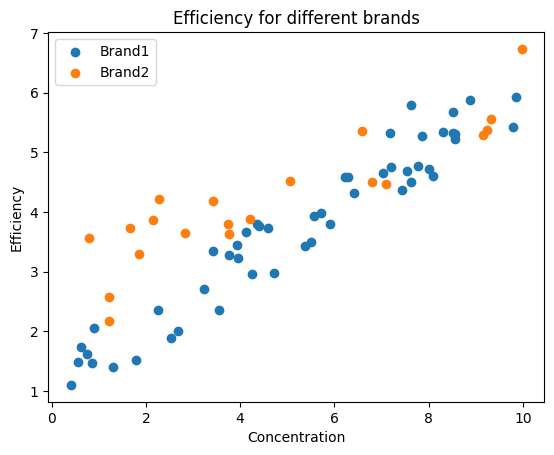

the mean of the efficiency for brand 1:  3.749377999999999
the variance of the efficiency for brand 1:  1.912902228916
the mean for the efficiency brand 2:  4.216485
the variance for the efficiency brand 2:  1.080557849275


In [3]:
...
# Extracting data for brand 1
dataframe_brand_1=dataframe[dataframe['Brand']=='Brand_1']
x_1=dataframe_brand_1['Concentration']
y_1=dataframe_brand_1['Efficiency']
# Extracting data for brand 2
dataframe_brand_2=dataframe[dataframe['Brand']=='Brand_2']
x_2=dataframe_brand_2['Concentration']
y_2=dataframe_brand_2['Efficiency']

#plot for brand 1
plt.scatter(x_1,y_1,label='Brand1')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')

# Plotting for brand 2
plt.scatter(x_2,y_2,label='Brand2')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')

plt.legend()
plt.title('Efficiency for different brands')
plt.show()
# computing mean and variance for both models
print("the mean of the efficiency for brand 1: ",np.mean(y_1))
print("the variance of the efficiency for brand 1: ",np.var(y_1))
print("the mean for the efficiency brand 2: ",np.mean(y_2))
print("the variance for the efficiency brand 2: ",np.var(y_2))
# Q1.1
# Oui le produit semble avoir un effet en visualisant le nuage des points(concentration,efficiency)
# pour les 2 brandes, on peut constater une sorte de linéarité entre la concentration et l'efficacité
# Cette effet est à peu près le même pour les 2 marques mais la pente est différent pour les 2 produits
# et donc on conclut aussi cet effet dépend de la concentration du produit



### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

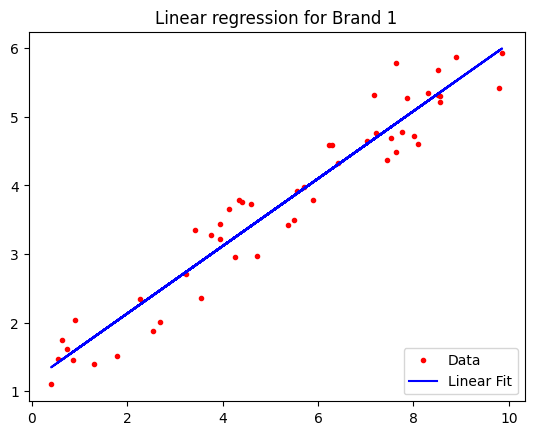

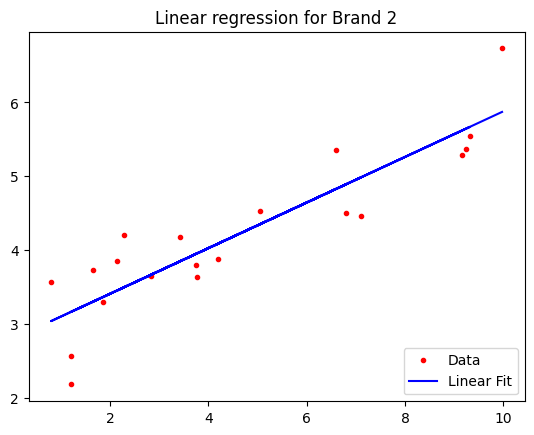

F   : 0.581547
df : (49,19)
s1_sq   : 0.128874
s2_sq : 0.221606
alpha : 0.05
F_crit_low   : 0.495483
F_crit_high : 2.298347
reject_H0     : False



In [4]:
#Q 1.2
# Modèle d’analyse de covariance :
# y_ij = b0j + b1j * x_ij + e_ij pour j = 1,2 (1 = Marque 1, 2 = Marque 2), avec e_ij gaussien centré.
# Étape 1 : estimer b01, b11, b02, b12.
# Étape 2 : calculer les résidus par marque (e1 et e2) et leurs variances empiriques s1^2 et s2^2.
# Test de Fisher d’égalité des variances :
# H0 : sigma1^2 = sigma2^2
# H1 : sigma1^2 != sigma2^2
# Statistique : F = s1^2 / s2^2 ; sous H0, F ~ F(n1-1, n2-1).
# Décision au seuil alpha = 5% (test bilatéral) :
# rejeter H0 si F < F_{alpha/2}(n1-1, n2-1) ou F > F_{1-alpha/2}(n1-1, n2-1).
from scipy import stats
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
X1 = x_1.to_numpy().reshape(-1, 1)
X2 = x_2.to_numpy().reshape(-1, 1)
# Estimation de b01 et b11 pour la Brand 1
lr.fit(X1, y_1)  
b01=lr.intercept_ 
b11=lr.coef_[0]
fig = plt.figure()
plt.plot(x_1, y_1, 'r.')
plt.plot(x_1, lr.predict(X1), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression for Brand 1')
plt.show()
# Estimation de b01 et b11 pour la Brand 2
lr.fit(X2, y_2)
b02=lr.intercept_
b12=lr.coef_[0]
# Affichage des résulats
fig = plt.figure()
plt.plot(x_2, y_2, 'r.')
plt.plot(x_2, lr.predict(X2), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression for Brand 2')
plt.show()

# 1) Résidus corrects
e1 = y_1 - (b11 * x_1 + b01)  # Brand 1
e2 = y_2 - (b12 * x_2 + b02)  # Brand 2

# 2) Variances échantillonnales (ddof=1) et ddl
s1_sq = np.var(e1)
s2_sq = np.var(e2)
n1, n2 = len(e1), len(e2)
df1, df2 = n1 - 1, n2 - 1

# 3) Statistique F
F = s1_sq / s2_sq

print(f"F   : {F:.6f}")
print(f"df : ({df1},{df2})")
print(f"s1_sq   : {s1_sq:.6f}")
print(f"s2_sq : {s2_sq:.6f}")
# Décision au seuil alpha
alpha = 0.05
F_low  = stats.f.ppf(alpha/2, df1, df2)
F_high = stats.f.ppf(1 - alpha/2, df1, df2)
reject = (F < F_low) or (F > F_high)
# print({'alpha': alpha, 'F_crit_low': F_low, 'F_crit_high': F_high, 'reject_H0': reject})

print(f"alpha : {alpha:.2f}")
print(f"F_crit_low   : {F_low:.6f}")
print(f"F_crit_high : {F_high:.6f}")
print(f"reject_H0     : {reject}")
print("==================================\n")

# L'hypothèse 0 n'est pas rejeté. Donc la linéarité entre la concentration et l'efficaicté ne dépend pas du produit



 



## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


X=pandas.read_csv('E2_sensor_vals.csv',sep=';')


Y=pandas.read_csv('E2_stress_vals.csv')

#TODO



### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


/tmp/ipykernel_2582/2045285888.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1 = np.float64(lr.coef_[0])   # b1 comme scalaire


===== Résultats pour sensor_01 =====
LOO-CV MSE : 11.152055
slope_b1   : 0.412143
R2  : 0.221019
t_stat     : 4.227868
t_crit     : 1.998972
Conclusion : Relation significative (b1 ≠ 0)



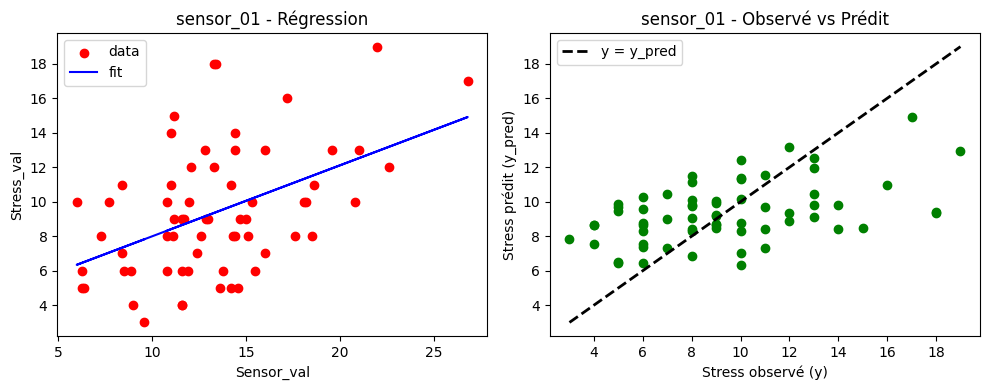

/tmp/ipykernel_2582/2045285888.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1 = np.float64(lr.coef_[0])   # b1 comme scalaire


===== Résultats pour sensor_12 =====
LOO-CV MSE : 13.972768
slope_b1   : -0.785226
R2  : 0.165931
t_stat     : -3.540242
t_crit     : 1.998972
Conclusion : Relation significative (b1 ≠ 0)



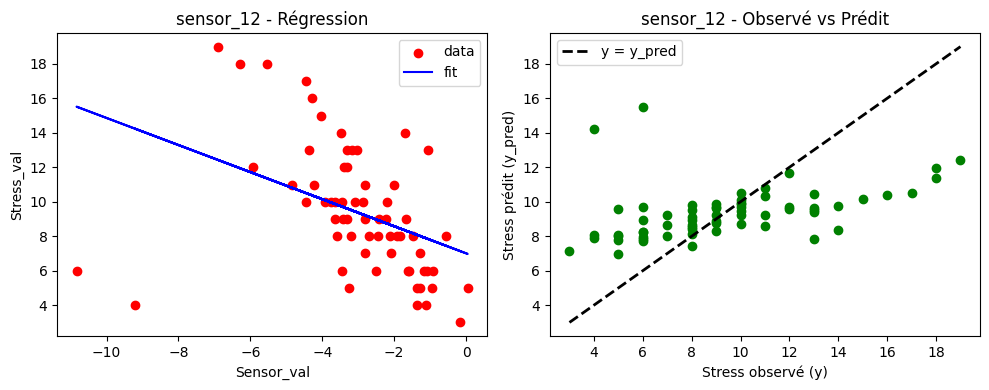

/tmp/ipykernel_2582/2045285888.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1 = np.float64(lr.coef_[0])   # b1 comme scalaire


===== Résultats pour sensor_15 =====
LOO-CV MSE : 4.108440
slope_b1   : 0.070309
R2  : 0.714995
t_stat     : 12.571739
t_crit     : 1.998972
Conclusion : Relation significative (b1 ≠ 0)



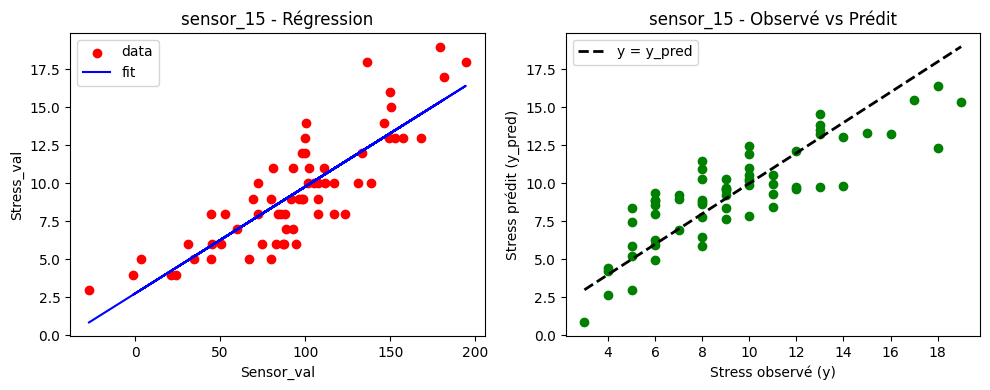

In [6]:
# Q2.2.1
# n=np.size(X,0)
# print(n)
# Le nombre d'observation est petit (n=64) donc il est judicieux d'utiliser la méthode de Leave-me-out
# On conclut que le capteur sensor_15 avait le score MSE le moins élevé avec 
# la méthod de validation croisée "Leave-me-out" .

# Q2.2.2 # Pour vérifier s'il existe une relation statistique entre le niveau de stress et 
# # l'un des sensors indépendamment en calculant b0 et b1 les coefficents de la regression linéaire 
# # Notre test sera formulé comme ça 
# # H0: b1=0 
# # H1: b1!=0
# et on utilise t_stat = (b1-0) / np.sqrt(s2 / (n-1)*Sxx) qui suit la loi de student de degrès n-2 

from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

candadate_sensors = ['sensor_01','sensor_12','sensor_15']
alpha = 0.05  # niveau d'incertitude à 5%

for sensor in candadate_sensors:
    # --- Données du capteur ---
    x = X[sensor].to_numpy().reshape(-1, 1)
    y = Y.to_numpy()
    n = len(x)

    # --- Leave-One-Out CV avec scoring MSE ---
    lr = LinearRegression()
    loo = LeaveOneOut()
    scores = cross_val_score(lr, x, y, cv=loo, scoring="neg_mean_squared_error")
    mse_loo = -scores.mean()
    
    # --- Fit final ---
    lr.fit(x, y)
    b1 = np.float64(lr.coef_[0])   # b1 comme scalaire
    y_pred = lr.predict(x)
    residuals = y - y_pred

    # Variance résiduelle
    SSE = np.sum(residuals**2)
    s2 = SSE / (n - 1)

    # Sxx
    Sxx = np.sum((x.ravel() - x.mean())**2)

    # Statistique t
    t_stat = b1 / np.sqrt(s2 / Sxx)
    t_crit = stats.t.ppf(1 - alpha/2, df=n-2)
    significant = abs(t_stat) > t_crit
    message = "Relation significative (b1 ≠ 0)" if significant else "Pas de relation significative (b1 = 0)"

    # === R^2 manuellement ===
    y_bar = y.mean()
    SST = np.sum((y - y_bar)**2)
    SSR = SST - SSE
    R2 = SSR / SST 

    # --- Print des résultats (avant le plot) ---
    print(f"===== Résultats pour {sensor} =====")
    print(f"LOO-CV MSE : {mse_loo:.6f}")
    print(f"slope_b1   : {b1:.6f}")
    print(f"R2  : {R2:.6f}")
    print(f"t_stat     : {t_stat:.6f}")
    print(f"t_crit     : {t_crit:.6f}")
    print(f"Conclusion : {message}")
    print("==================================\n")

    # --- Tracé ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

   # --- 1 : Données + droite de régression ---
    axes[0].scatter(X[sensor], y, label='data', color='r')
    axes[0].plot(X[sensor], y_pred, label='fit', color='b')
    axes[0].set_xlabel("Sensor_val")
    axes[0].set_ylabel("Stress_val")
    axes[0].set_title(f"{sensor} - Régression")
    axes[0].legend()

    # --- 2 : Observé vs Prédit ---
    axes[1].scatter(y, y_pred, color='g')
    axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label="y = y_pred")
    axes[1].set_xlabel("Stress observé (y)")
    axes[1].set_ylabel("Stress prédit (y_pred)")
    axes[1].set_title(f"{sensor} - Observé vs Prédit")
    axes[1].legend()

    plt.tight_layout()
    plt.show()




    



    

    


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


Indices des pics : [62  2]


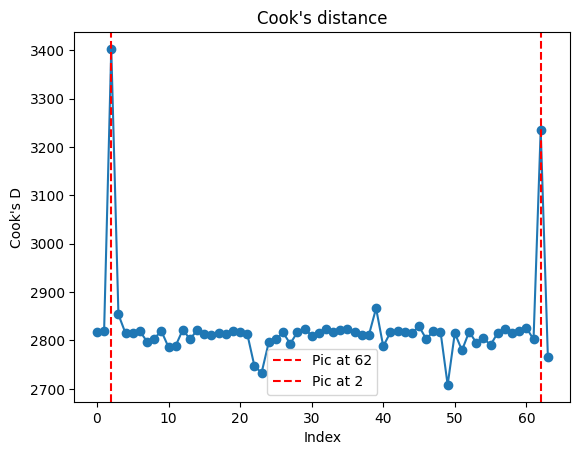

Seuil ±2 : outliers potentiels aux indices [2, 22, 23, 49, 51, 62]
Seuil Bonferroni (t_61; α=0.05/n) = 3.536 : indices [2, 62]


In [7]:
# Q2.3.1: Stratégie 1
#Pour détecter automatiquement les données aberrantes dans une jeu de données, on utilise la distance de Cook
# et si on trouve des données ou la distance de Cook présente un pic on l'élimine
def profil_residuel(x, y, i):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr = LinearRegression()
    lr.fit(x_del_i.reshape(-1, 1), y_del_i)  # reshape en 2D
    y_j = lr.predict(x.reshape(-1, 1))       # reshape en 2D
    return y - y_j

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)

def cook(x, y, i):
    # refit sur toutes les données pour avoir le modèle de référence
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    y_pred = lr.predict(x.reshape(-1, 1))
    
    erreur = profil_residuel(x, y, i)
    di = np.sum(erreur**2) / (2 * s2(y, y_pred))
    return di

# ======================
sensor='sensor_12'
x = X[sensor].to_numpy()   # <-- en 1D
y = Y.to_numpy()
n = len(x)

cook_vecteur = np.zeros((n,1))
for i in range(n):
    cook_vecteur[i] = cook(x, y, i)

# Chercher les deux indices des plus grands Cook's D
top2_idx = np.argsort(cook_vecteur.ravel())[-2:]  # les 2 plus grands
print("Indices des pics :", top2_idx)

plt.figure()
plt.plot(range(n), cook_vecteur, marker='o')
plt.title("Cook's distance")
plt.xlabel("Index")
plt.ylabel("Cook's D")

# Ajouter les lignes verticales aux indices trouvés
for idx in top2_idx:
    plt.axvline(x=idx, color='r', linestyle='--', label=f"Pic at {idx}")

# Pour éviter plusieurs fois la même légende
plt.legend()
plt.show()
# Q2.3.2: Stratégie 2
# Les erreurs de prédiction suivent une loi normale centrée
# Ainsi on peut utiliser les résidus studentisés ti = ei /(s(i)*√(1 −hii)
# Donc ces résidus suivent une loi de Student a (n −3) degrés de liberté.
# Il est ainsi possible de construire un test d’hypothèse pour tester la présence
# d’observations atypique. Plusieurs observations peuvent de même être simul-
# tanément considérees en utilisant l’inégalité de Bonferroni. En pratique, les
# r ́esidus studentis ́es sont sonvent compar ́es aux bornes ±2. Si un résidu studentise 
# n’est pas dans cet intervale de valeurs, il est consid ́er ́e comme atypique.
# Dans ce cas là notre test statistique sera
# H0(i) : l’observation i est conforme au modèle (pas d’outlier)
#         t_i = e_i / (s_(i) * sqrt(1 - h_ii)) ~ t_{n-3} sous H0
# H1(i) : l’observation i est atypique (outlier)
#         |t_i| > t_{1-α/(2n), n-3}  (test bilatéral avec correction de Bonferroni)

# --- Données ---
sensor = 'sensor_12'
x = X[sensor].to_numpy()     # 1D
y = Y.to_numpy()
n = len(x)
# --- Régression simple ---
lr = LinearRegression().fit(x.reshape(-1,1), y)
y_hat = lr.predict(x.reshape(-1,1))
e = y - y_hat                         # résidus
SSE = np.sum(e**2)
s2 = SSE / (n - 1)                    # comme dans ton cours (et non n-2)

# --- Leverage h_ii (simple régression avec intercept) ---
xbar = x.mean()
Sxx = np.sum((x - xbar)**2)
h = (1.0/n) + ((x - xbar)**2) / Sxx   # h_ii

# --- Variance sans l'observation i et résidus studentisés supprimés ---
s2_i = ((n - 1)*s2 - (e**2)/(1 - h)) / (n - 3)   # s_(i)^2
t_del = e / (np.sqrt(s2_i) * np.sqrt(1 - h))     # t_i

# --- Tests d'hypothèse ---
alpha = 0.05
tcrit_bonf = stats.t.ppf(1 - alpha/(2*n), df=n - 3)  # Bonferroni
idx_out_simple = np.unique(np.where(np.abs(t_del) > 2)[0])  # règle ±2
idx_out_bonf   = np.unique(np.where(np.abs(t_del) > tcrit_bonf)[0]) 

print(f"Seuil ±2 : outliers potentiels aux indices {idx_out_simple.tolist()}")
print(f"Seuil Bonferroni (t_{n-3:.0f}; α={alpha}/n) = {tcrit_bonf:.3f} : indices {idx_out_bonf.tolist()}")





 







### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



alpha=1 -> MSE=5.555451
alpha=0.5 -> MSE=3.993176
alpha=0.1 -> MSE=4.993688
alpha=0.05 -> MSE=7.239149
alpha=0.01 -> MSE=8.926253
alpha=0.05 -> MSE=7.239149
alpha=0.01 -> MSE=8.926253

Choix provisoire: alpha=0.5 avec MSE_min=3.993176 (n=62)
alpha=0.45 -> MSE=3.878963
alpha=0.46 -> MSE=3.901194
alpha=0.47 -> MSE=3.923731
alpha=0.49 -> MSE=3.969722
alpha=0.5 -> MSE=3.993176
alpha=0.51 -> MSE=4.016936
alpha=0.52 -> MSE=4.041001
alpha=0.53 -> MSE=4.065371
alpha=0.54 -> MSE=4.090047
alpha=0.55 -> MSE=4.115029

Choix final: alpha=0.45 avec MSE_min=3.878963 (n=62)
Seuil |beta| > 0.1
Features sélectionnées : ['sensor_01', 'sensor_12', 'sensor_15']
Coefficients correspondants : [0.45206361543623447, -0.7998441301024944, 1.8365998227440985]


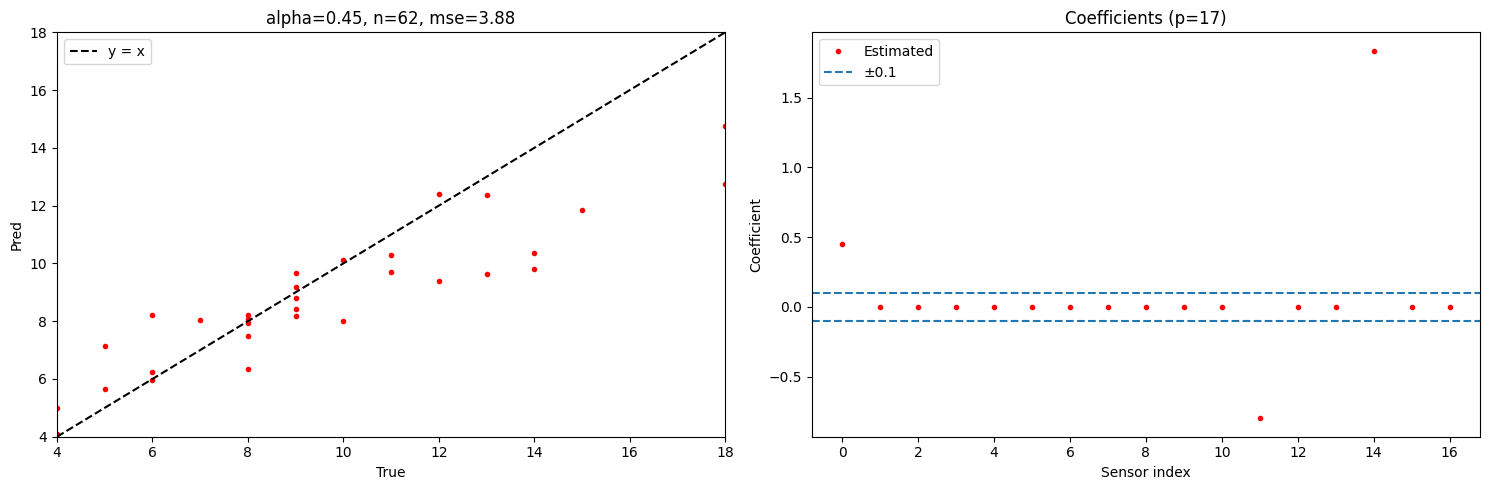

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Q 2.4.1:
# Sans normalisation, les variables avec des plages plus grandes pourraient influencer indûment le modèle, 
# éclipsant les contributions des variables avec des plages plus petites. 
# Cela peut fausser les résultats, conduisant à des prédictions biaisées ou incorrectes.
# Q 2.4.2 :
# On va utiliser la régression de Lasso pour annuler les coeffiencients qui ont de faible contribution 
# dans la régression linéaire  en faisant une optimisation sur alpha pour obtenir le meilleur mse
# Comme montre la figure tout en bas le sensor_01 et le sensor_15

# multiple 
# --- Données ---

out_idx = [2, 62]  # indices détectés à la Q2.3
mask = ~np.isin(np.arange(len(y)), out_idx)

X_clean = X[mask]          # si X est np.array ; si DataFrame -> X.loc[mask]
y_clean = y[mask]          # idem Series -> Y.loc[mask]


# --- Standardisation ---
X_scaled = preprocessing.scale(X_clean)
n, p = X_scaled.shape

# Pour récupérer les noms de variables si X est un DataFrame

feature_names = np.array(X.columns)


# --- 1ère recherche grossière ---
alphas = [1, 0.5, 0.1, 0.05, 0.01, 0.05, 0.01]
thresh = n // 2
X_train, y_train = X_scaled[thresh:], y_clean[thresh:]
X_test,  y_test  = X_scaled[:thresh],  y_clean[:thresh]

best_alpha = None
best_mse = np.inf
best_pred = None
best_model = None

for a in alphas:
    lasso_regressor = Lasso(alpha=a)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lasso)
    print(f"alpha={a} -> MSE={mse:.6f}")
    if mse < best_mse - 1e-12:
        best_mse = mse
        best_alpha = a
        best_pred = y_pred_lasso
        best_model = lasso_regressor

print(f"\nChoix provisoire: alpha={best_alpha} avec MSE_min={best_mse:.6f} (n={n})")

# --- 2ème recherche fine autour de 0.5  ---
alphas = [0.45, 0.46, 0.47, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55]

# (on réutilise le même split)
best_alpha = None
best_mse = np.inf
best_pred = None
best_model = None

for a in alphas:
    lasso_regressor = Lasso(alpha=a)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lasso)
    print(f"alpha={a} -> MSE={mse:.6f}")
    if mse < best_mse - 1e-12:
        best_mse = mse
        best_alpha = a
        best_pred = y_pred_lasso
        best_model = lasso_regressor

print(f"\nChoix final: alpha={best_alpha} avec MSE_min={best_mse:.6f} (n={n})")

# --- Sélection par seuil sur |β| ---
beta = best_model.coef_.ravel()
threshold = 0.1  # = 0.1
sel_mask = np.abs(beta) > threshold
sel_idx = np.where(sel_mask)[0]
sel_names = feature_names[sel_idx]

print(f"Seuil |beta| > {threshold:.3g}")
print("Features sélectionnées :", sel_names.tolist())
print("Coefficients correspondants :", beta[sel_idx].tolist())

# --- Plots UNIQUEMENT pour l'alpha optimal ---
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # <-- côte à côte

# 1) y_true vs y_pred (alpha optimal)
axes[0].plot(y_test, best_pred, 'r.')
# --- diagonale y = x ---
m = min(np.min(y_test), np.min(best_pred))
M = max(np.max(y_test), np.max(best_pred))
axes[0].plot([m, M], [m, M], 'k--', linewidth=1.5, label='y = x')
axes[0].set_xlim(m, M)
axes[0].set_ylim(m, M)
# ------------------------
axes[0].set_title(f"alpha={best_alpha}, n={n}, mse={best_mse:.2f}")
axes[0].set_xlabel("True")
axes[0].set_ylabel("Pred")
axes[0].legend()


# 2) coefficients du modèle (alpha optimal)
axes[1].plot(beta, 'r.', label="Estimated")
axes[1].axhline(+threshold, ls='--')
axes[1].axhline(-threshold, ls='--', label=f"±{threshold:g}")
axes[1].set_title(f"Coefficients (p={p})")
axes[1].set_xlabel("Sensor index")
axes[1].set_ylabel("Coefficient")
axes[1].legend()

plt.tight_layout()
plt.show()

# Annotation des features sélectionnées
for j in sel_idx:
    axes[1].annotate(feature_names[j],
                     xy=(j, beta[j]),
                     xytext=(5, 5),
                     textcoords="offset points",
                     fontsize=8, rotation=45)

axes[1].legend()
plt.tight_layout()
plt.show()
# On peut constater que les données de seulement les données de capteurs
# "sensor_01",sensor__12" et "sensor_15" semblent fiable pour prédire 
# le niveau de stress








alpha=1 -> MSE=6.484437
alpha=0.5 -> MSE=5.585431
alpha=0.1 -> MSE=6.213596
alpha=0.05 -> MSE=7.378582
alpha=0.01 -> MSE=8.588701
alpha=0.05 -> MSE=7.378582
alpha=0.01 -> MSE=8.588701

Choix provisoire: alpha=0.5 avec MSE_min=5.585431 (n=64)
alpha=0.45 -> MSE=5.465213
alpha=0.46 -> MSE=5.488398
alpha=0.47 -> MSE=5.511975
alpha=0.49 -> MSE=5.560431
alpha=0.5 -> MSE=5.585431
alpha=0.51 -> MSE=5.610946
alpha=0.52 -> MSE=5.637873
alpha=0.53 -> MSE=5.667331
alpha=0.54 -> MSE=5.697227
alpha=0.55 -> MSE=5.727561

Choix final: alpha=0.45 avec MSE_min=5.465213 (n=64)
Seuil |beta| > 0.1
Features sélectionnées : ['sensor_01', 'sensor_12', 'sensor_15']
Coefficients correspondants : [0.6182936525797421, -0.14380699925315163, 2.0942232762447457]


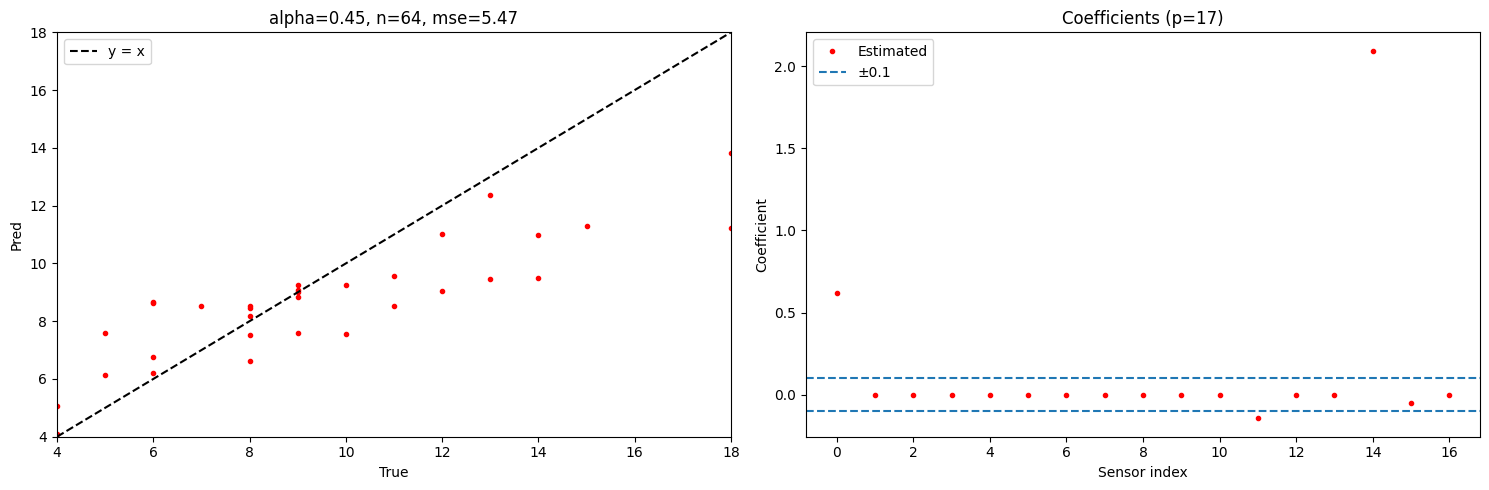

<Figure size 640x480 with 0 Axes>

In [9]:
#Q 2.4.3: On va faire la même étude que la question 2.4.2 mais sans supprimer les outliers
# --- Standardisation ---
X_scaled = preprocessing.scale(X)
n, p = X_scaled.shape

# Pour récupérer les noms de variables si X est un DataFrame

feature_names = np.array(X.columns)


# --- 1ère recherche grossière ---
alphas = [1, 0.5, 0.1, 0.05, 0.01, 0.05, 0.01]
thresh = n // 2
X_train, y_train = X_scaled[thresh:], y[thresh:]
X_test,  y_test  = X_scaled[:thresh],  y[:thresh]

best_alpha = None
best_mse = np.inf
best_pred = None
best_model = None

for a in alphas:
    lasso_regressor = Lasso(alpha=a)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lasso)
    print(f"alpha={a} -> MSE={mse:.6f}")
    if mse < best_mse - 1e-12:
        best_mse = mse
        best_alpha = a
        best_pred = y_pred_lasso
        best_model = lasso_regressor

print(f"\nChoix provisoire: alpha={best_alpha} avec MSE_min={best_mse:.6f} (n={n})")

# --- 2ème recherche fine autour de 0.5  ---
alphas = [0.45, 0.46, 0.47, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55]

# (on réutilise le même split)
best_alpha = None
best_mse = np.inf
best_pred = None
best_model = None

for a in alphas:
    lasso_regressor = Lasso(alpha=a)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lasso)
    print(f"alpha={a} -> MSE={mse:.6f}")
    if mse < best_mse - 1e-12:
        best_mse = mse
        best_alpha = a
        best_pred = y_pred_lasso
        best_model = lasso_regressor

print(f"\nChoix final: alpha={best_alpha} avec MSE_min={best_mse:.6f} (n={n})")

# --- Sélection par seuil sur |β| ---
beta = best_model.coef_.ravel()
threshold = 0.1  # = 0.1
sel_mask = np.abs(beta) > threshold
sel_idx = np.where(sel_mask)[0]
sel_names = feature_names[sel_idx]

print(f"Seuil |beta| > {threshold:.3g}")
print("Features sélectionnées :", sel_names.tolist())
print("Coefficients correspondants :", beta[sel_idx].tolist())

# --- Plots UNIQUEMENT pour l'alpha optimal ---
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # <-- côte à côte

# 1) y_true vs y_pred (alpha optimal)
axes[0].plot(y_test, best_pred, 'r.')
# --- diagonale y = x ---
m = min(np.min(y_test), np.min(best_pred))
M = max(np.max(y_test), np.max(best_pred))
axes[0].plot([m, M], [m, M], 'k--', linewidth=1.5, label='y = x')
axes[0].set_xlim(m, M)
axes[0].set_ylim(m, M)
# ------------------------
axes[0].set_title(f"alpha={best_alpha}, n={n}, mse={best_mse:.2f}")
axes[0].set_xlabel("True")
axes[0].set_ylabel("Pred")
axes[0].legend()


# 2) coefficients du modèle (alpha optimal)
axes[1].plot(beta, 'r.', label="Estimated")
axes[1].axhline(+threshold, ls='--')
axes[1].axhline(-threshold, ls='--', label=f"±{threshold:g}")
axes[1].set_title(f"Coefficients (p={p})")
axes[1].set_xlabel("Sensor index")
axes[1].set_ylabel("Coefficient")
axes[1].legend()

plt.tight_layout()
plt.show()

# Annotation des features sélectionnées
for j in sel_idx:
    axes[1].annotate(feature_names[j],
                     xy=(j, beta[j]),
                     xytext=(5, 5),
                     textcoords="offset points",
                     fontsize=8, rotation=45)

axes[1].legend()
plt.tight_layout()
plt.show()
# On peur remaquer que sans supprimer les outliers ,le mse passe de 3.878963 à 5.465213
# de plus le coefficient du sensor_12 est devenu très petit à cause de l'effet Levier des Outliers
# D'ou l'imporatance d'enlever les outliers avant la régression 